# Conjunto de Julia

Conjunto de Julia
O Conjunto de Julia leva o nome do matemático francês Gaston Julia, que contribuiu significativamente para o estudo da dinâmica complexa no início do século XX, ao lado de Pierre Fatou. Esses conjuntos ganharam destaque posteriormente com a popularização da geometria fractal por Benoît B. Mandelbrot nos anos 1980.

Um fato interessante e marcante é que esse matemático era reconhecido por usar uma máscara no rosto por ter perdido o nariz em combate na Primeira Guerra Mundial.

O Conjunto de Julia é um fractal bidimensional definido para um valor fixo de $c$. Ele consiste nos pontos iniciais $z_0$ do plano complexo cuja órbita da recorreência a seguir não diverge:

$z_0 = 0 \newline$
$z_{n+1} = (z_n)^2 + c$

Para cada valor de $c$, há um conjunto de Julia diferente.

In [9]:
from utils import ComplexNumber

def julia_recurrence(z_n: ComplexNumber, c: ComplexNumber) -> ComplexNumber:
    return z_n**2 + c

# Teste de divergência:

O seu teste de divergência é exatamente igual ao do Mandelbrot, porém, agora, variando o $z_0$.

In [10]:
import numpy as np

iterations = 800
escape_radius = 2
c1, c2, c3 = ComplexNumber(-1.75, 0), ComplexNumber(-1.4, 0), ComplexNumber(-1.39, 0)
c4, c5, c6 = ComplexNumber(-1.32, 0), ComplexNumber(-1.14, 0), ComplexNumber(0, 0)
points_c = [c1, c2, c3, c3, c5, c6]

def test_z_0(z_0, c, iterations=800, escape_radius=2):
    try:
        z = z_0
        for _ in range(iterations-1):
            z = julia_recurrence(z, c)
            if z.mod > escape_radius:
                return False
    except OverflowError:
        return False
    return True

# Encontrando números do conjunto:

In [ ]:
julia_set = np.empty((0, 2))
width, height = (1000, 1000)

X = np.linspace(-1.5, 1.5, num=width)
Y = np.linspace(-1.5, 1.5, num=height)

julia_sets = []
for c in points_c:
    points = []
    for x in X:
        for y in Y:
            z_0 = ComplexNumber(x, y)
            if test_z_0(z_0, c, iterations, escape_radius):
                points.append([x, y])
    julia_sets.append(np.array(points))

print(len(julia_sets[0]))

6052


# Plotando conjuntos no Plano de Argand-Gauss:

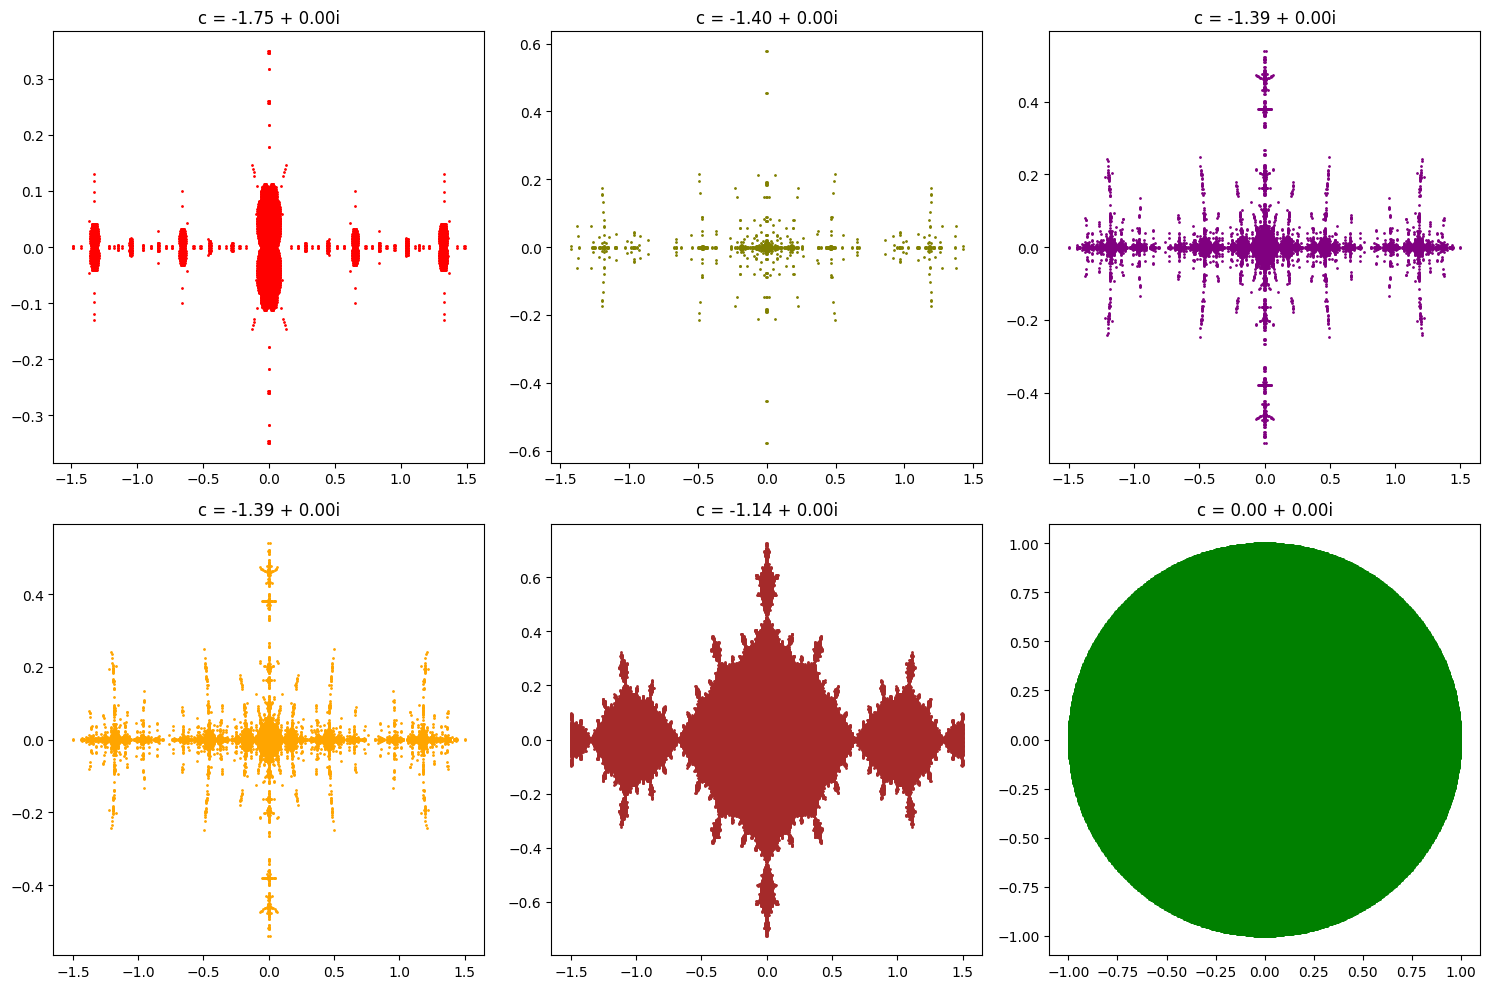

In [32]:
import matplotlib.pyplot as plt

colors = ['red', 'olive', 'purple', 'orange', 'brown', 'green']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, set in enumerate(julia_sets):
    axes[i].scatter(set[:, 0], set[:, 1], color=colors[i], s=1.0)
    cx, cy = points_c[i][0], points_c[i][1]
    axes[i].set_title(f"c = {cx:.2f} + {cy:.2f}i")

plt.tight_layout()
plt.show()